Leeza Sergeeva
Homework 3
4/11/2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [4]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In the folder with Monday's notebook is a file called classify_me.csv. The column 'Target' gives the class labels.

In [5]:
classify_me=pd.read_csv('classify_me.csv')
classify_me.head()

,Unnamed: 0,A,B,C,D,E,F,G,H,I,J,Target
0,0,0.150333,-1.468600,0.420842,-0.878333,-1.348358,0.686323,-0.663374,-2.301067,1.302455,0.320666,2
1,1,-1.632086,-0.705800,0.336495,0.024062,-0.493619,-1.534829,-0.024577,-0.296786,0.320047,0.506105,1
2,2,-1.285627,1.381077,-0.385668,1.446167,-0.348163,-2.255813,0.272703,-0.964729,-1.515589,0.454248,2
3,3,-0.012135,-0.729971,-1.132579,1.076787,1.235348,1.234472,-1.809369,0.735971,-1.349093,-0.061655,0
4,4,-1.303877,0.930213,0.801927,-1.750493,0.846840,-0.258996,-0.507816,0.560169,0.583438,-0.472208,0


1. Read in this file. How many classes are there? How many features are there? Are there any missing entries? 

In [6]:
# check how many unique classes in dataset
classify_me.Target.unique()

array([2, 1, 0])

In [7]:
# check for missing values
classify_me.isna().sum()

Unnamed: 0    0
A             0
B             0
C             0
D             0
E             0
F             0
G             0
H             0
I             0
J             0
Target        0
dtype: int64

In [8]:
# check for categorical data
classify_me.dtypes

Unnamed: 0      int64
A             float64
B             float64
C             float64
D             float64
E             float64
F             float64
G             float64
H             float64
I             float64
J             float64
Target          int64
dtype: object

In [9]:
classify_me.columns

Index(['Unnamed: 0', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
       'Target'],
      dtype='object')

2. Split into training and test sets (30% test set). Use random_state=5 so your splits are reproducible. 

In [10]:
X=classify_me.drop(['Unnamed: 0','Target'],axis=1)
y=classify_me['Target']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=5)

3. Use all the features to build a classifier on the training set. Try bagging, random forest, boosting, and k-nearest neighbors. For knn, cross validate the number of neighbors you use. In your random forest implementation, build the trees deep -- that is, do not set a value for max_depth. For bagging and random forest,  cross validate the number of trees you use (given by the n_estimators parameter). For your boosting model, validate all of the parameters: n_estimators, learning_rate, and max_depth. In all three models, set random_state=5 so the results are reproducible.  

K-nearest neighbors

In [12]:
# Specify the model method including the number of neighbors to use. Then, fit on the training data.
clf = KNeighborsClassifier(n_neighbors=1)
nb1=clf.fit(X_train,y_train)

In [13]:
accuracy_score(nb1.predict(X_test),y_test)

0.48

In [14]:
accuracy_score(nb1.predict(X_train),y_train)

1.0

Cross-validation

In [15]:
#Create a list to store the results
cvres=[]
# Run through various values for k: use 5-fold cross validation, score with accuracy
for i in range(1,100):
    clf = KNeighborsClassifier(n_neighbors=i)
    nn = cross_validate(clf, X_train, y_train, cv=5, scoring='accuracy')
    #The test score gives an list of the accuracy on each of the five the test-folds
    cvres.append(nn['test_score'].mean())

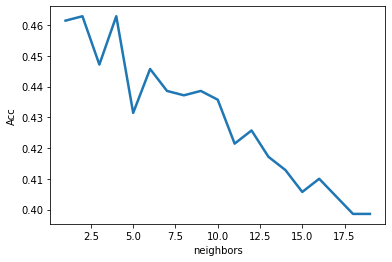

In [16]:
plt.plot(list(range(1,20)),cvres[0:19],linewidth=2.5)
plt.xlabel('neighbors')
plt.ylabel('Acc')
plt.show()

In [17]:
nn['test_score']

array([0.37857143, 0.37857143, 0.37857143, 0.37142857, 0.37142857])

In [18]:
np.argmax(cvres)

1

In [19]:
best_k = np.argmax(cvres)+1
print("Looks like best results when  𝑘 =", best_k)

Looks like best results when  𝑘 = 2


In [20]:
mod_best = KNeighborsClassifier(n_neighbors=best_k)
nb_best=mod_best.fit(X_train,y_train)

In [21]:
np.round(accuracy_score(nb_best.predict(X_test),y_test),3)

0.47

In [22]:
mod_best = KNeighborsClassifier(n_neighbors=4)
nb_best=mod_best.fit(X_train,y_train)
np.round(accuracy_score(nb_best.predict(X_test),y_test),3)

0.487

Actually the model performs where nearest K is 4. Since there are two peaks on the graph.

Bagging

In [23]:
from sklearn.ensemble import BaggingRegressor

In [24]:
regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=100,oob_score=True,random_state=5).fit(X_train, y_train)

In [25]:
print("R^2 is {}".format(regr.score(X_test,y_test)),":",":", "MSE is {}".format(mean_squared_error(regr.predict(X_test),y_test)))

R^2 is 0.05489832087847857 : : MSE is 0.5747373333333333


In [26]:
regr.oob_score_

0.12093478247929679

In [27]:
num_trees=np.linspace(50,2000,10, endpoint=False)

In [28]:
oob_res=[]
for trs in num_trees:
    res = BaggingRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=int(trs),oob_score=True,random_state=5).fit(X_train, y_train)
    oob_res.append(res.oob_score_)

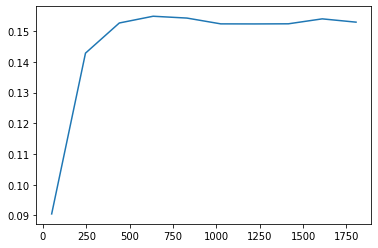

In [29]:
plt.plot(num_trees,oob_res)

In [30]:
num_trees[np.argmax(oob_res)]

635.0

In [31]:
opt_trs=int(num_trees[np.argmax(oob_res)])

In [32]:
regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=opt_trs,random_state=5).fit(X_train, y_train)

In [33]:
np.round(regr.score(X_test,y_test),3)

0.068

Random forest

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
rf = RandomForestRegressor(n_estimators=300,max_features='sqrt',random_state=5).fit(X_train,y_train)

In [77]:
rf.score(X_test,y_test)

0.09467480343254608

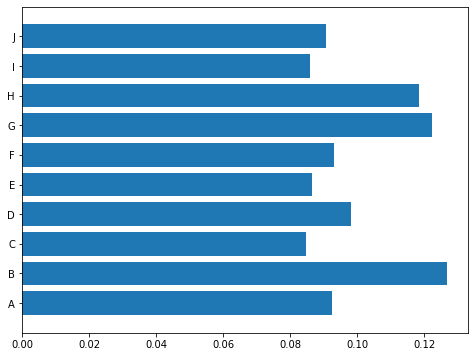

In [78]:
plt.figure(figsize=(8,6))
nfeat=X.shape[1]
plt.barh(np.arange(nfeat),rf.feature_importances_,align='center')
plt.yticks(np.arange(nfeat),list(X.columns))
plt.ylim(-1,nfeat)
plt.show()

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
rfc = RandomForestClassifier(n_estimators=300,max_features='sqrt',random_state=5).fit(X_train,y_train)

In [93]:
accuracy_score(rfc.predict(X_test),y_test)

0.6433333333333333

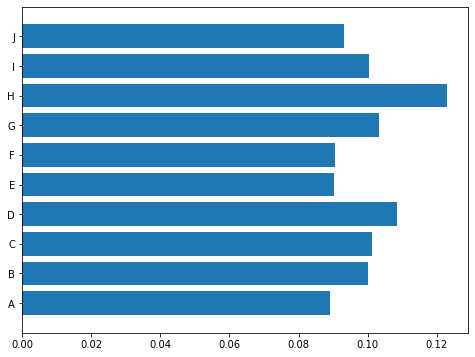

In [86]:
plt.figure(figsize=(8,6))
nfeat=X.shape[1]
plt.barh(np.arange(nfeat),rfc.feature_importances_,align='center')
plt.yticks(np.arange(nfeat),list(X.columns))
plt.ylim(-1,nfeat)
plt.show()

Boosting

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

In [43]:
breg = GradientBoostingRegressor(random_state=5,learning_rate=0.1,n_estimators=500,max_depth=2).fit(X_train,y_train)

In [44]:
breg.score(X_test,y_test)

-0.08315514608199659

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
parameters = {'learning_rate':[0.1,0.01], 'n_estimators':[200,300,400,500,600],'max_depth':[1,2,3,4,5]}

In [47]:
bmod = GradientBoostingRegressor(random_state=5)

In [48]:
boost_regr = GridSearchCV(bmod, parameters)
boost_regr.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(random_state=5),
             param_grid={'learning_rate': [0.1, 0.01],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [200, 300, 400, 500, 600]})

In [49]:
df=pd.DataFrame.from_dict(boost_regr.cv_results_)

In [50]:
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.116060,0.008968,0.001498,0.000323,0.1,1,200,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",0.179390,0.197224,0.087274,0.146557,0.188220,0.159733,0.040068,6
1,0.161034,0.005419,0.001482,0.000076,0.1,1,300,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",0.197611,0.209943,0.098536,0.139246,0.190157,0.167098,0.041893,1
2,0.221815,0.006814,0.001620,0.000186,0.1,1,400,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",0.211062,0.205375,0.101248,0.124255,0.191282,0.166644,0.045064,2
3,0.290907,0.015715,0.001763,0.000324,0.1,1,500,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",0.213440,0.202974,0.103959,0.111813,0.181623,0.162762,0.046032,3
4,0.345305,0.019881,0.001705,0.000173,0.1,1,600,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",0.212789,0.203965,0.107911,0.112444,0.175668,0.162556,0.044513,4


In [51]:
df[df['mean_test_score']==df['mean_test_score'].max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.161034,0.005419,0.001482,0.000076,0.1,1,300,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",0.197611,0.209943,0.098536,0.139246,0.190157,0.167098,0.041893,1


In [52]:
best_breg = GradientBoostingRegressor(random_state=5,learning_rate=0.1,n_estimators=300,max_depth=1).fit(X_train,y_train)

In [53]:
np.round(best_breg.score(X_test,y_test),3)

0.126

Bagging Classifier, Random Forest Classifier, Gradient Boosting Classifier, Decision Tree Classifier 

In [54]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [55]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=300,random_state=0).fit(X_train, y_train)
accuracy_score(clf.predict(X_test),y_test)

0.62

In [56]:
rfclf = RandomForestClassifier(n_estimators=300, max_features='sqrt',random_state=5).fit(X_train,y_train)
accuracy_score(rfclf.predict(X_test),y_test)

0.6433333333333333

In [57]:
bst_clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1,max_depth=1, random_state=5).fit(X_train, y_train)
accuracy_score(bst_clf.predict(X_test),y_test)

0.72

In [58]:
single_tree_clf = DecisionTreeClassifier(random_state=5)
path = single_tree_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [59]:
cvres=[]
for a in ccp_alphas:
    st_clf = DecisionTreeClassifier(random_state=5, ccp_alpha= a)
    cvclf = cross_validate(st_clf, X_train, y_train, cv=5, scoring='accuracy')
    cvres.append(cvclf['test_score'].mean())

In [60]:
al=ccp_alphas[np.argmax(cvres)]

In [61]:
our_clf = DecisionTreeClassifier(random_state=5, ccp_alpha=al).fit(X_train,y_train)
accuracy_score(our_clf.predict(X_test),y_test)

0.5

In [62]:
nclf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1,max_depth=1, random_state=5).fit(X_train, y_train)
accuracy_score(nclf.predict(X_test),y_test)

0.72

In [63]:
rfh_clf = RandomForestClassifier(n_estimators=300,max_depth=1, oob_score=True,max_features='sqrt',random_state=0).fit(X_train,y_train)
accuracy_score(rfh_clf.predict(X_test),y_test)

/home/hamstersnail/miniconda3/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.44333333333333336

In [64]:
rfh_clf.oob_score_

0.44857142857142857

In [65]:
bst_clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1,max_depth=1, random_state=0).fit(X_train, y_train)
accuracy_score(bst_clf.predict(X_test),y_test)

0.72

In [66]:
lm = LogisticRegression(random_state=5).fit(X_train, y_train)
accuracy_score(lm.predict(X_test),y_test)

0.4166666666666667

4. Comment on which model gives the best results on the test set.  For the best model, comment on feature importances (if relevant). 

* bagging -> accuracy score = 0.62
* random forest -> accuracy score = 0.64
* gradient boosting -> accuracy score = 0.72 with parameters random_state=5,learning_rate=0.1,n_estimators=300,max_depth=1
* k-nearest neighbors -> accuracy score = 0.487; value k=4

Gradient boosting classifier is the best model for this data set.